In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Get current period
year = str(datetime.now().year)
month = str(datetime.now().month)
if len(year + "-" + month) == 6:
    cur_period = year + "-0" + month
else:
    cur_period = year + "-" + month
cur_period

'2022-08'

In [3]:
# # Overall Category
df = pd.read_csv("/Users/grantarbuckle/Desktop/Data Analytics/Datasets/Discover Purchases.csv")
df["month_year"] = pd.to_datetime(df['Post Date']).dt.to_period('M').astype(str)
all_cats = df
all_cats = all_cats.drop(columns = ["Trans. Date", "Description", "Post Date"])
all_cats.groupby(["month_year", "Category"]).sum().reset_index()
all_cats

,Amount,Category,month_year
0,-379.90,Payments and Credits,2021-01
1,28.35,Supermarkets,2021-01
2,6.99,Merchandise,2021-01
3,36.32,Merchandise,2021-01
4,43.45,Supermarkets,2021-01
...,...,...,...
1605,7.04,Restaurants,2022-08
1606,50.29,Supermarkets,2022-08
1607,7.00,Merchandise,2022-08
1608,45.31,Restaurants,2022-08


In [4]:
# Focus on merchandise category
merch_cat = df[~df["Category"].isin(["Payments and Credits", "Awards and Rebate Credits"])]
merch_cat["month_year"] = pd.to_datetime(merch_cat['Post Date']).dt.to_period('M')
merch_cat = merch_cat.drop(columns = ["Trans. Date", "Description", "Post Date"])
merch_cat.groupby(["month_year", "Category"]).sum().reset_index()
merch_cat

/var/folders/yp/yvp41cjj7k785rj1gdry9k280000gn/T/ipykernel_66687/2641717540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merch_cat["month_year"] = pd.to_datetime(merch_cat['Post Date']).dt.to_period('M')


,Amount,Category,month_year
1,28.35,Supermarkets,2021-01
2,6.99,Merchandise,2021-01
3,36.32,Merchandise,2021-01
4,43.45,Supermarkets,2021-01
5,77.02,Merchandise,2021-01
...,...,...,...
1605,7.04,Restaurants,2022-08
1606,50.29,Supermarkets,2022-08
1607,7.00,Merchandise,2022-08
1608,45.31,Restaurants,2022-08


In [23]:
# Group by date
date_grouping = df[~df["Category"].isin(["Payments and Credits", "Awards and Rebate Credits"])]
date_grouping = date_grouping.drop(columns = ["Category"]).groupby("month_year").sum().reset_index()
date_grouping = date_grouping.sort_values("Amount", ascending = False)
date_grouping

,month_year,Amount
18,2022-07,4161.49
8,2021-09,3548.07
9,2021-10,3166.89
5,2021-06,3079.22
3,2021-04,2823.90
17,2022-06,2606.73
2,2021-03,2572.30
10,2021-11,2364.70
7,2021-08,2206.10
12,2022-01,2205.90


In [25]:
# Group by category
category_grouping = df.drop(columns = ["month_year"]).groupby("Category").sum().reset_index()
category_grouping = category_grouping[~category_grouping["Category"].isin(["Payments and Credits", "Awards and Rebate Credits"])]
category_grouping = category_grouping.sort_values("Amount", ascending = False)
category_grouping

,Category,Amount
8,Merchandise,17207.26
10,Restaurants,9246.70
12,Supermarkets,6560.04
11,Services,4996.61
4,Gasoline,4073.43
13,Travel/ Entertainment,2001.38
2,Department Stores,252.96
0,Automotive,172.15
7,Medical Services,139.00
3,Education,96.49


In [16]:
# Group by description
df2 = df[~df["Category"].isin(["Payments and Credits", "Awards and Rebate Credits"])]
df2["month_year"] = pd.to_datetime(df2['Post Date']).dt.to_period('M')
df2 = df2.drop(columns = ["Trans. Date", "Post Date", "Category"])
df2["Description"] = df2["Description"].str[:10] # Only keep first 10 characters of desc
description_grouping = df2.groupby(["Description", "month_year"]).sum().reset_index().sort_values("Amount", ascending = False)
description_grouping.head(10)

/var/folders/yp/yvp41cjj7k785rj1gdry9k280000gn/T/ipykernel_66687/2819230491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["month_year"] = pd.to_datetime(df2['Post Date']).dt.to_period('M')


,Description,month_year,Amount
101,BESTBUYCOM,2022-07,1871.43
118,BURROW NEW,2021-09,1723.77
651,SQ *SAFE H,2021-04,780.00
221,EB ANALYTI,2022-01,650.00
28,AMAZON.COM,2022-06,521.22
43,AMZN MKTP,2021-10,499.43
652,SQ *SAFE H,2021-06,480.00
917,WF WAYFAIR,2021-11,476.13
40,AMZN MKTP,2021-06,445.21
23,AMAZON.COM,2021-10,436.99


Text(0.5, 1.0, 'Top Spending by Category')

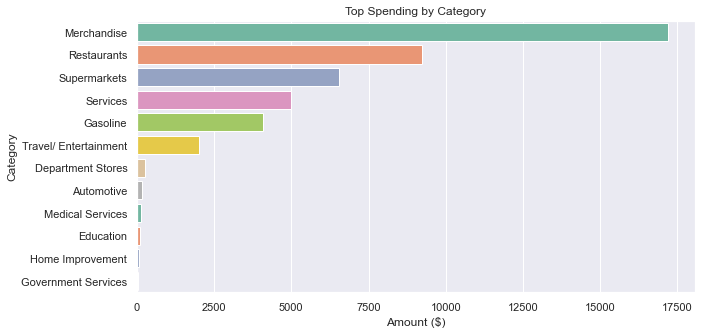

In [38]:
# Plot a barchart for spending by category
plt.figure(figsize = (10, 5))
sns.set(style="darkgrid")
sns.barplot(x = 'Amount', 
            y = 'Category', 
            data = category_grouping, 
            palette = 'Set2')
plt.xlabel('Amount ($)')
plt.ylabel('Category')
plt.title('Top Spending by Category')

Text(0.5, 1.0, 'Top Spending by Description')

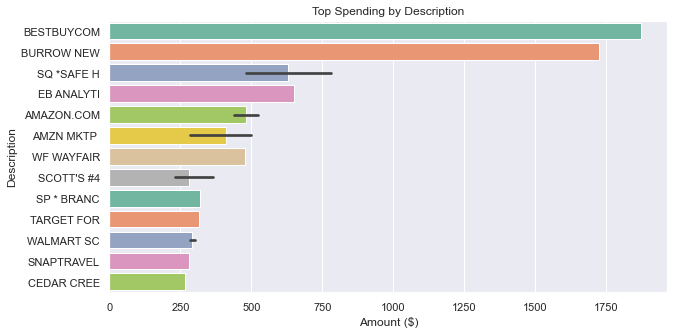

In [9]:
# Plot a barchart for spending by description
description_grouping = description_grouping.head(20)

plt.figure(figsize = (10, 5))
sns.set(style="darkgrid")
sns.barplot(x = 'Amount', 
            y = 'Description', 
            data = description_grouping, 
            palette = 'Set2')
plt.xlabel('Amount ($)')
plt.ylabel('Description')
plt.title('Top Spending by Description')

Text(0.5, 1.0, 'Top Spending by Month-Year')

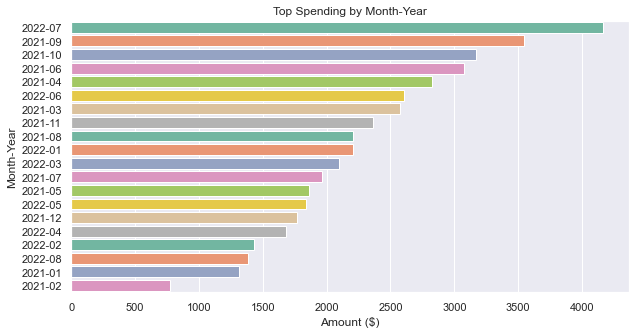

In [39]:
# Plot a barchart for spending by month-year
plt.figure(figsize = (10, 5))
sns.set(style="darkgrid")
sns.barplot(x = 'Amount', 
            y = 'month_year', 
            data = date_grouping, 
            palette = 'Set2')
plt.xlabel('Amount ($)')
plt.ylabel('Month-Year')
plt.title('Top Spending by Month-Year')